In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

Loading the dataset

In [14]:
breast_cancer = datasets.load_breast_cancer()

In [15]:
breast_cancer_df = pd.DataFrame(data = breast_cancer.data,  columns = breast_cancer.feature_names)
breast_cancer_df["target"] =  breast_cancer.target
breast_cancer_df["state"] = breast_cancer.target_names[breast_cancer.target]

In [16]:
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,state
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


Visulaizing the Data

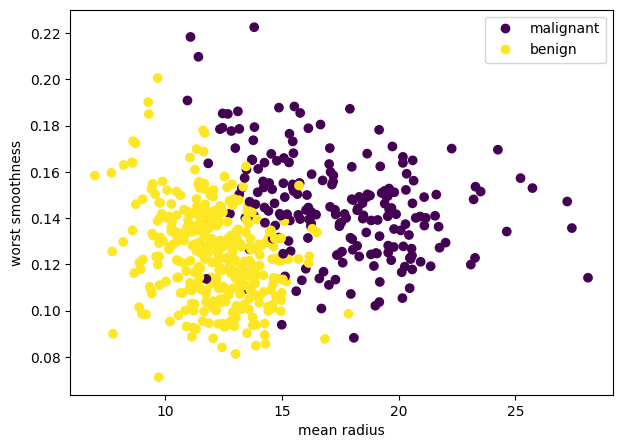

In [17]:
#plot between feature no. (a) and feature no. (b)
a, b = 0, 24

fig, ax = plt.subplots(figsize=(7,5))

scatter = ax.scatter(breast_cancer_df[breast_cancer.feature_names[a]], breast_cancer_df[breast_cancer.feature_names[b]], c=breast_cancer.target)
ax.set_xlabel(breast_cancer.feature_names[a])
ax.set_ylabel(breast_cancer.feature_names[b])
fig = ax.legend(scatter.legend_elements()[0], breast_cancer.target_names)

Data Preparation

In [18]:
from sklearn import preprocessing

X = preprocessing.scale(breast_cancer.data)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, breast_cancer_df["target"], test_size=0.2)

In [25]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


Using Logistic Regressin

In [26]:
from sklearn.linear_model import LogisticRegression

bc_model = LogisticRegression(random_state = 0)
bc_model.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [27]:
predictions= bc_model.predict(X_test)
accuracy = np.sum(1-np.abs(predictions-y_test)) / y_test.shape[0]

In [28]:
accuracy_p = "{:.2f}".format(accuracy*100)
print("accuracy: " + accuracy_p + "%")

accuracy: 98.25%
